# Lecture 5: Introduction to Probability Theory (Part III)

## Objectives

+ To introduce continuous random variables.
+ To introduce the cumulative distribution function and its properties.
+ To introduce the probability density function and its properties.
+ To introduce the expectation of continuous random variables.
+ To introduce the concept of the joint probability density function.
+ To introduce the concept of predictive intervals.
+ To introduce some common continuous distributions.
+ To introduce the decision making problem.
+ To present some simple analytical examples Bayesian inference.

## Readings

+ These notes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import numpy as np

## Something more on probability spaces

It turns out that when $\Omega$ is a continuous space, like $\mathbb{R}$ for example, it is not possible to take $\mathcal{F}$ to be all the subsets of $\Omega$ (you need to take a measure-theoretic probability theory class to understand why this is).
However, many "nice" subsets of $\Omega$ are usually in $\mathcal{F}$.
For example, in the case of $\Omega=\mathbb{R}$, $\mathcal{F}$ can include all intervals, and any countable unions and intersections of intervals.
That's a lot of sets.

In any case, $\mathcal{F}$ must satisfy certain properties for everything to be well-defined.
These properties are:
+ $\Omega \in \mathcal{F}$
+ For any $A$ in $\mathcal{F}$, the complement $A^c$ is in $\mathcal{F}$.
+ For any $A_1,A_2,\dots$ in $\mathcal{F}$, the union $\cup_n A_n$ is in $\mathcal{F}$.
When a set of subsets $\mathcal{F}$ satisfies these properties, we say that it forms a $\sigma$-algebra.

## Continuous random variables

Consider a probability space $(\Omega, \mathcal{F}, \mathbb{P})$.
A continuous random variable models the result of an experiment that can potentially take infinitely many values.
That is, it is a function
$$
X:\Omega \rightarrow \mathbb{R}.
$$

## The cumulative distribution function

Let $X$ be a continuous random variable.
Its cumulative distribution function (CDF) $F_X(x)$ gives the probability that $X$ is smaller than $x$:
$$
F_X(x) := \mathbb{P}(X\le x) = \mathbb{P}\left(\left\{\omega: X(\omega) \le x\right\}\right).
$$

### Properties of the cumulative distribution function

+ $F_X(x)$ is an increasing function.
+ $F_X(-\infty) = 0$.
+ $F_X(+\infty) = 1$.
+ $\mathbb{P}(a\le X \le b) = F_X(b) - F_X(a)$.

## The probability density function

The probability density function (PDF) is a "function" $f_X(x)$ that can give us the probability that $X$ is in any "good" subset $A$ of $\mathbb{R}$ as follows:
$$
\mathbb{P}(X\in A) = \int_A f_X(x) dx.
$$
Note that certain random variables may not have a PDF that is a function.
That's why I put the word "function" in quotes.
However, if you allow the PDF to include Dirac's $\delta$, then any random variable has a PDF.
We will ignore this complication for the moment.

In this class, we will simplify the notation and we will be writing:
$$
p(x) \equiv f_X(x),
$$
when there is no ambiguity.

### Properties of the probability density function
+ $p(x) \ge 0$ for all $x$.
+ $\int_{-\infty}^{\infty} p(x) dx = 1$.
+ The derivative of the CDF is the PDF, i.e., $F_X'(x) = p(x)$.

### Dirac's delta and a unified view of all random variables

Dirac's $\delta$ is a special function, actually called a distribution, which is defined as follows:
$$
\delta(x) = 0,
$$
for $x\not=0$, and
$$
\int_{-\infty}^\infty \delta(x) dx = 0
$$
You can think of Dirac's $\delta$ as the PDF of a discrete random variable that takes the value $0$ with probability one.

Using Dirac's $\delta$ you can make any discrete random variable you want look like a continuous random variable.
For example, consider a Categorical random variable taking values $x_1,\dots,x_K$ with probabilities $p_1,\dots,p_K$.
The PDF of this random variable can be written as:
$$
p(x) = \sum_{k=1}^Kp_k\delta(x - x_k).
$$

The most general random variable one can think of has a PDF that consists of two parts:
$$
p(x) = f^n_X(x) + f^{\delta}_X(x),
$$
a part $f^n_X(x)$ that is a nice proper function and a part $f^{\delta}_X(x)$ that consists of a weighted sum of Dirac $\delta$'s. 

## Expectations of continuous random variables

The expectation of a continuous random variable is:
$$
\mathbb{E}[X] = \int_{-\infty}^\infty x p(x)dx.
$$
Its properties are the same as the expectation of a discrete random variable.

The expectation of a function of the random variable is:
$$
\mathbb{E}[f(X)] = \int_{-\infty}^\infty f(x)p(x)dx.
$$

In general, using the Dirac $\delta$ trick we introduced above, there is no need to differentiate between integrations and summations.
We can use integration for both continuous and discrete random variables.

## Example: The uniform distribution

The uniform distribution is the most common continuous distribution.
It corresponds to a random variable that is equally likely to take a value within a given interval.
We write:
$$
X\sim U([0,1]),
$$
and we read $X$ follows a uniform distribution taking values in $[0,1]$.

The probability density of the uniform is constant in $[0,1]$ and zero outside it.
We have:
$$
p(x) := U(x|[0,1]) := f_X(x) = \begin{cases}
1,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

The cumulative distribution funciton of the uniform is:
$$
F_X(x) = \mathbb{P}(X \le x) = \int_0^x f_X(u) du = \int_0^x du = x.
$$

$$
\mathbb{P}(a \le X \le b) = F_X(b) - F_X(a) = b - a.
$$

The expectation of the uniform is:
$$
\mathbb{E}[X] = \int_0^1 xdx = \frac{1}{2}.
$$

The variance of the uniform is:
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \left(\mathbb{E}[X]\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$

In [2]:
# Let's demonstrate how you can sample from the uniform
import scipy.stats as st
X = st.uniform()
X.rvs(size=100)

array([0.0280382 , 0.71649296, 0.69585731, 0.86454015, 0.99865222,
       0.44944781, 0.18611376, 0.13704935, 0.68821139, 0.96951703,
       0.35429754, 0.19284666, 0.06210441, 0.77288643, 0.81311121,
       0.100864  , 0.75058422, 0.32134921, 0.74537746, 0.70842339,
       0.67674824, 0.08748944, 0.94447767, 0.82519631, 0.82359022,
       0.2297998 , 0.11758483, 0.65556878, 0.89404761, 0.68471793,
       0.16562713, 0.10681614, 0.90412657, 0.709893  , 0.72169094,
       0.39552758, 0.89917293, 0.30179062, 0.26130416, 0.36024673,
       0.55671956, 0.58854111, 0.81161797, 0.47713926, 0.61994643,
       0.518404  , 0.10126401, 0.58164728, 0.00808194, 0.90978029,
       0.00519012, 0.409727  , 0.40430306, 0.78114076, 0.07411076,
       0.18910324, 0.99506872, 0.21338334, 0.58584328, 0.2201198 ,
       0.5426388 , 0.58782253, 0.08237183, 0.18506724, 0.20170359,
       0.27251501, 0.800697  , 0.87053792, 0.28387355, 0.66533778,
       0.98818295, 0.3209168 , 0.31100264, 0.11812317, 0.82241

In [3]:
# An alternative way is to use the functionality of numpy
np.random.rand(100)

array([0.15937765, 0.05842135, 0.75320583, 0.14686389, 0.11124253,
       0.09899011, 0.62810614, 0.6358785 , 0.17961613, 0.95836574,
       0.83201433, 0.44158948, 0.33233398, 0.07507923, 0.19044704,
       0.58518812, 0.35462817, 0.58595314, 0.43111284, 0.56572275,
       0.54296399, 0.55158349, 0.25630418, 0.87271427, 0.61221346,
       0.82352595, 0.87850017, 0.12573434, 0.38514678, 0.71289178,
       0.48931867, 0.98741815, 0.87058438, 0.12831612, 0.0923542 ,
       0.71621483, 0.29134641, 0.63250381, 0.52980688, 0.99495793,
       0.03691378, 0.78166883, 0.79797143, 0.54154475, 0.13336735,
       0.61487943, 0.14603847, 0.02629496, 0.35407667, 0.57533722,
       0.05357424, 0.25561074, 0.44340706, 0.73074615, 0.74838374,
       0.09648241, 0.91663758, 0.56394892, 0.15674682, 0.96169036,
       0.27151179, 0.31573949, 0.14169   , 0.43419512, 0.11249428,
       0.56422556, 0.88721943, 0.64773554, 0.51154328, 0.18198811,
       0.99335177, 0.94614229, 0.26805037, 0.99542314, 0.31752

### Questions

+ Modify the code above so that you sample from a uniform distribution taking values in $[2, 5]$?

## Joint probability density function

Let $X$ and $Y$ be two random variables.
There joint probability density $f_{X,Y}(x,y)$ is the function that can give us the probability that the pair $(X,Y)$ belongs to any "good" subset $A$ of $\mathbb{R}^2$ as follows:
$$
\mathbb{P}\left((X,Y)\in A\right) = \int\int_{A} f_{X,Y}(x,y)dxdy.
$$
Of course, we will be writing:
$$
p(x,y) := f_{X,Y}(x,y),
$$
when there is no ambiguity.

If you integrate one of the variables out of the joint, you get the PDF of the other variable.
For example:
$$
p(x) = \int_{-\infty}^\infty p(x,y) dy,
$$
and
$$
p(y) = \int_{-\infty}^\infty p(x, y) dx.
$$

For many random variables $X_1,\dots,X_N$ their joint PDF $p(x_1,\dot,x_N)$ is similarly defined.
Again, integrating out some variables gives the pdf of the others.

## Conditioning a random variable on another

Consider two random variables $X$ and $Y$.
If we had observed that $Y=y$, how would this change the PDF of $X$?
The answer is given via Bayes' rule.
The PDF of $X$ conditioned on $Y=y$ is:
$$
p(x|y) = \frac{p(x,y)}{p(y)}.
$$

## Example: Inferring the probability of a coin toss from data (1/4)

This is our first Bayesian inference example!

Let's say that we run a coin toss experiment $N$ times and we wish to figure out the probability of heads.
We will bring into the picture all the mathematical machinery we have introduced so far.
Let's say that the data we have observe are $x_1,\dots,x_N$.
For notational convenience we will be writing:
$$
x_{1:N} := (x_1,\dots,x_N).
$$

First, let's start with the probability of success of the coin toss.
Let's call it $\theta$.
How can we describe our uncertainty about it?
We have to assign a *prior* probability distribution on it.
Let's say that we don't know anything about it except that it must be between 0 and 1.
What distribution should we assign?
Of course, a uniform distribution:
$$
\theta \sim U([0,1]).
$$
Second, each coin toss experiment corresponds to an independent Bernoulli variable with the same probability of success $\theta$.
We write:
$$
X_n | \theta \sim \operatorname{Bernoulli}(\theta),
$$
for $n=1,\dots,N$.
Note that these random variables depend on $\theta$.
That's why we are conditioning like this.

Before proceeding with the mathematics, let's draw the graph.

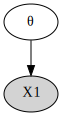

In [4]:
# First for one coin toss
from graphviz import Digraph
gc = Digraph('coin_toss_bayes_1')
gc.node('theta', label='<&theta;>')
gc.node('X1', label='<X<sub>1</sub>>', style='filled')
gc.edge('theta', 'X1')
gc.render('coin_toss_bayes_1', format='png')
gc

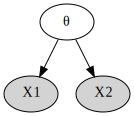

In [5]:
# Now for two coin tosses
gc2 = Digraph('coin_toss_bayes_2')
gc2.node('theta', label='<&theta;>')
gc2.node('X1', label='<X<sub>1</sub>>', style='filled')
gc2.node('X2', label='<X<sub>2</sub>>', style='filled')
gc2.edge('theta', 'X1')
gc2.edge('theta', 'X2')
gc2.render('coin_toss_bayes_2', format='png')
gc2

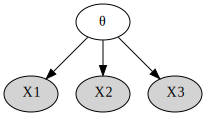

In [6]:
# Now for three coin tosses
gc3 = Digraph('coin_toss_bayes_3')
gc3.node('theta', label='<&theta;>')
gc3.node('X1', label='<X<sub>1</sub>>', style='filled')
gc3.node('X2', label='<X<sub>2</sub>>', style='filled')
gc3.node('X3', label='<X<sub>3</sub>>', style='filled')
gc3.edge('theta', 'X1')
gc3.edge('theta', 'X2')
gc3.edge('theta', 'X3')
gc3.render('coin_toss_bayes_3', format='png')
gc3

Because this notation gets a little bit too involved, we introduce the so called [plate notation](https://en.wikipedia.org/wiki/Plate_notation).
Whategver is inside the subgrpah indicated by the box is supposed to be repeated as many times as indicated:

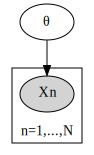

In [7]:
gcp = Digraph('coin_toss_bayes_plate')
gcp.node('theta', label='<&theta;>')
with gcp.subgraph(name='cluster_0') as sg:
    sg.node('Xn', label='<X<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gcp.edge('theta', 'Xn')
gcp.render('coin_toss_bayes_plate', format='png')
gcp

To carry out Bayesian inference, we need the joint probability density of all variables.
It is:
$$
p(x_1,\dots,x_N, \theta) = p(x_{1:N}|\theta) p(\theta) = \left(\prod_{n=1}p(x_n|\theta)\right)p(\theta),
$$
where we first used Bayes' rule and then the fact that the coin tosses are independent.
We must find the mathematical form of all these expressions.
For $\theta$, we simply have:
$$
p(\theta) = 1_{[0,1]}(\theta),
$$
where $1_A(x)$ is the indicator function of $A$, i.e., $1_A(x) = 1$ if $x$ is in $A$ and zero otherwise.
For the Bernoulli pmf's we have:
$$
p(X_n = 1|\theta) = \theta,
$$
and
$$
p(X_n = 0|\theta) = 1- \theta.
$$
So, in a unified way, we can write:
$$
p(x_n | \theta) = \theta^{x_n}(1-\theta)^{1-x_n}.
$$
Now, let's re-write the joint pmf:
$$
p(x_1,\dots,x_N, \theta) = \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}1_{[0,1]}(\theta),
$$
which has a nice interpretation as it depends only on the total number of heads $\sum_{n=1}^Nx_n$.

Now, we are in a position to apply Bayes rule to condition on the data.
We have:
$$
p(\theta|x_{1:N}) = \frac{p(x_{1:N},\theta)}{p(x_{1:N})} \propto p(x_{1:N}, \theta) = \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}1_{[0,1]}(\theta).
$$
It may be the first time you encounter this, but we have actually discovered a new distribution called the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).
This is what the posterior turns out to be.
This is one of the few instances where the posterior is analytically available.
We will return to the example, once we introduce the Beta distribution.

## Example: The Beta distribution

The Beta distribution is suitable for random variables that take values in $[0,1]$ but are not necessarily uniform.
We write:
$$
X\sim \operatorname{Beta}(\alpha, \beta),
$$
where $\alpha$ and $\beta$ are positive shape parameters.
The interpretation of the parameters is more or less this:
+ The bigger $\alpha$ is, the more the distribution is pulled towards zero.
+ The bigger $\beta$ is, the more the distribution is pulled towards one.

The PDF of the Beta is:
$$
p(x) = \frac{x^{\alpha-1}(1-x)^{\beta - 1}}{B(\alpha,\beta)},
$$
where
$$
B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)},
$$
where $\Gamma$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function).
It's expectation is:
$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}.
$$

## Example: Inferring the probability of a coin toss from data (2/4)

Now, that we know about the Beta distribution, we can write for the posterior of $\theta$:
$$
p(\theta|x_{1:N}) = \operatorname{Beta}\left(\theta\middle|1 + \sum_{n=1}^Nx_n, 1 + N - \sum_{n=1}^Nx_n\right).
$$
where with $\operatorname{Beta}(\theta|\alpha,\beta)$ we mean the PDF of the $\operatorname{Beta}(\alpha,\beta)$ evaluated at $\theta$ (this is a very useful notation).
So, we see that the $\alpha$ parameter is just one plus the number of heads and the $\beta$ parameter is one plus the number of tails.

Let's try this out with some fake data.

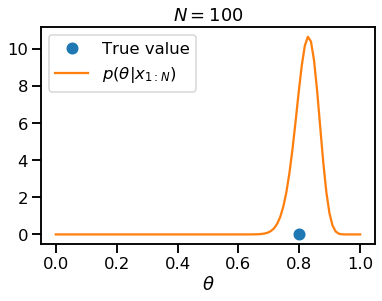

In [8]:
# Take a fake coin which is a little bit biased
theta_true = 0.8
# This is the random variable corresponding to a coin toss
X = st.bernoulli(theta_true)
# Sample from it a number of times to generate our data = (x1, ..., xN)
N = 100
data = X.rvs(size=N)
# Now we are ready to calculate the posterior which the Beta we have above
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)
# Now we can plot the posterior PDF for theta
fig, ax = plt.subplots()
thetas = np.linspace(0, 1, 100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

### Questions

+ Experiment with different values of $\theta_{\text{true}}$ and different values of $N$.
+ Is the true value always covered by the posterior PDF?

## Quantiles of a random variable

The posterior $p(\theta|x_{1:N})$ summarizes everything that we have to say about $\theta$.
It is the complete picture.
However, you may be asked to find an interval within which $\theta$ lies with high accuracy?
How do you do that?
For this we need the idea of quantiles.

Let $X$ be a random variable and $q$ be a number between $0$ and $1$.
The $q$-quantile of $X$ is the smaller number $x_q$ such that $X$ is smaller than $x_q$ with probability $q$.
Mathematically:
$$
\mathbb{P}(X\le x_q) = F_X(x_q) = q.
$$
(For the proper mathematical definition we need to use the concept of infimum.)
For example, you can find the $2.5\%$ quantile of a random variable, $x_{0.025}$:
$$
\mathbb{P}(X\le x_{0.025}) = 0.025,
$$
or the $97.5\%$ quantile:
$$
\mathbb{P}(X\le x_{0.975}) = 0.975.
$$
Then you can say that, with 95\% probability, $X$ lies between $x_{0.025}$ and $x_{0.975}$.
The interval $[x_{0.025}, x_{0.975}]$ is called a $95\%$ predictive interval.

## Example: Inferring the probability of a coin toss from data (3/4)

Let's apply the idea of quantiles to the coin toss example to find a 95\% predictive interval.

In [9]:
theta_low = Theta_post.ppf(0.025) # ppf stands for percent point function
theta_up = Theta_post.ppf(0.975)
print('Theta is in [{0:1.2f}, {1:1.2f}] with 95% probability'.format(theta_low, theta_up))

Theta is in [0.74, 0.89] with 95% probability


### Questions
+ How many coin tosses do you have to do, in order to estimate $\theta$ within an accuracy of $1\%$ with $99\%$ probability?

## The decision making problem

So, we learned about predictive intervals.
But what if someone asks you to report a single value for $\theta$ in the coin toss example?
What is the correct way of doing this?

This is actually a decision-making problem.
To answer it, you have to quantify the cost of making a mistake and then make a decision that minimizes this cost.
To formalize this concept, assume that we have a random variable $X$ and we have to guess a value for it.
Let $\ell(x, x')$ be the loss we incur when we guess $x$ and the true value is $x'$.
This is a completly subjective quantity.
However, here are some ideas:
+ The square loss:
$$
\ell_2(x,x') = (x-x')^2.
$$
+ The absolute loss:
$$
\ell_1(x,x') = |x-x'|.
$$

The rational thing to do, when choosing a value for $x$ is to minimize our *expected loss*, i.e., we make our choice by solving this problem:
$$
x^* = \min_x \mathbb{E}[\ell(x,X)].
$$
This, in general, is not a problem with an analytical solution.
However, for the two special loss functions above the answer is:
+ The choice that minimizes the square loss is the expectation of the random variable:
$$
x^* = \mathbb{E}[X].
$$
+ The choice that minimizes the absolute loss is the median, i.e., $x^*$ is the 50\% quantile:
$$
x^* = x_{0.5}.
$$

## Example: Inferring the probability of a coin toss from data (4/4)

Let's pick a $\theta$ by minimizing the square loss.
We just have to find the expectation of the posterior $p(\theta|x_{1:N})$ (which is just a Beta).
It is:
$$
\theta^*_N = \mathbb{E}[\theta|x_{1:N}] = \frac{1+\sum_{n=1}^Nx_n}{1+\sum_{n=1}^Nx_n + N + 1 - \sum_{n=1}^Nx_n}
= \frac{1 + \sum_{n=1}^Nx_n}{N+2}.
$$

In [10]:
# In the example we had above:
theta_star = Theta_post.expect()
print('E[X] = {0:1.2f}'.format(theta_star))

E[X] = 0.82


### Questions
+ Find the 50\% quantile of $\theta$ which minimizes the absolute loss.

## Example: The normal distribution

The normal (or Gaussian) distribution is a ubiquitous one.
It appears over and over again.
There are two explanations as to why it appears so often:

+ It is the distribution of maximum uncertainty that matches a known mean and a known variance variance.
+ It is the distribution that arises when you add a lot of random variables together.

We will learn about both these in the next lectures.

We write:
$$
X | \mu, \sigma \sim N(\mu, \sigma),
$$
and we read "$X$ conditioned on $\mu$ and $\sigma$ follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

When $\mu=0$ and $\sigma^2=1$, we say that we have a *standard normal* distribution.
Let
$$
Z\sim N(0,1).
$$
The PDF of the standard normal is:
$$
\phi(z) := N(z|0,1) = \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{z^2}{2}\right\}.
$$
The CDF of the standard normal is:
$$
\Phi(z) := \mathbb{P}(Z \le z) = \int_{-\infty}^z \phi(z')dz',
$$
is not analytically available.
However, there are codes that can compute it.

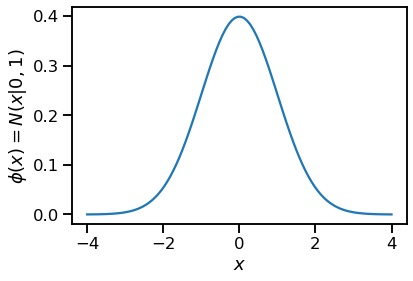

In [11]:
# Here is how you can get the PDF of the standard normal
Z = st.norm()
fig, ax = plt.subplots()
zs = np.linspace(-4.0, 4.0, 100)
ax.plot(zs, Z.pdf(zs))
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi(x) = N(x|0,1)$');

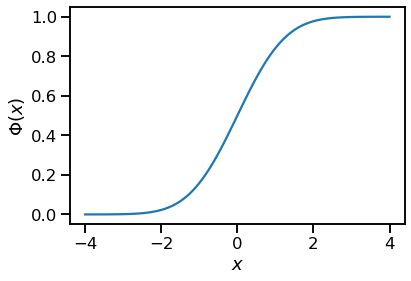

In [13]:
# And here is the CDF of the standard normal
fig, ax = plt.subplots()
ax.plot(zs, Z.cdf(zs))
ax.set_xlabel('$x$')
ax.set_ylabel('$\Phi(x)$');

In [14]:
# You can sample from the normal like this:
print(Z.rvs(size=100))

[ 4.26861961e-01  2.39615300e-01  1.14334787e+00 -1.16936972e+00
 -2.70108856e-01 -9.10053931e-01 -9.05209465e-02  1.51985367e+00
  7.42408078e-01 -1.01966500e+00 -6.48492484e-01 -1.21371611e+00
 -2.94760819e-02  1.11168464e+00  3.24915048e-01 -3.52613968e-01
  2.61222221e+00  2.68617477e-01 -3.38258427e-01  1.49741175e+00
  2.07274141e-01  1.42696536e+00  1.47872483e+00 -5.33561781e-02
  1.43702290e-01 -1.02000672e+00  2.24149645e-01  6.73772827e-01
 -3.73934455e-01  1.78729217e+00  6.57242933e-01 -2.33295252e+00
  5.37778219e-01 -5.10564511e-01 -7.09782889e-01  8.70916949e-02
 -1.24384200e+00 -6.90359315e-01  1.14550689e+00  1.37882601e+00
  1.48352240e+00 -2.14510428e+00 -3.14463971e-02 -1.72512010e-01
  1.94355733e-01 -9.82723537e-01  3.23475163e-01 -5.70170871e-01
  1.85858271e+00  1.59777010e+00  7.35023330e-01 -2.94305622e-01
 -2.65228942e-01 -6.92726118e-02 -3.40270967e-01 -4.06528056e-01
 -9.61847138e-01 -1.43173893e+00  4.52430110e-01  9.28916329e-01
 -1.23550795e+00 -5.97151

Using the standard normal, we can express any normal.
It is easy to show that:
$$
X = \mu + \sigma Z,
$$
follows a $N(\mu,\sigma^2)$ if $Z$ follows and $N(0,1)$.
You must remember this!
It is extremely useful and it will appear again and again.
For example, using this relationship you can sample from any normal using samples from the standard normal.
Let's take some samples exploiting this relationship and then compare the histogram to the true PDF.

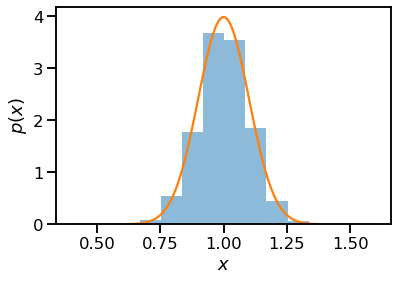

In [15]:
mu = 1.0
sigma = 0.1
X = st.norm(mu, sigma)
xs = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 100)
x_samples = mu + sigma * Z.rvs(size=10000)
fig, ax = plt.subplots()
ax.hist(x_samples, density=True, alpha=0.5)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

The reverse of the previous expression also holds.
For example, if $X | \mu, \sigma\sim N(\mu,\sigma)$, then the random variable
$$
Z = \frac{X-\mu}{\sigma},
$$
follows a standard normal.
You will be asked to prove this in the homework.

You should also remember the mathematical form of the PDF of $N(\mu,\sigma)$ which is:
$$
p(x) := \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} = \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right).
$$

There is also a very nice relationship between the CDF of $N(\mu,\sigma)$, call it $F(x)$, and the CDF of the standard normal $\Phi(z)$.
It is:
$$
F(x) = \mathbb{P}(X\le x|\mu,\sigma) = \mathbb{P}\left(\frac{X-\mu}{\sigma}\le \frac{x-\mu}{\sigma}\right) = \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

## Example: Infering the mean of a normal with a known variance

Assume that we are performing an experiment $X_n$ that measures the acceleration of gravity and that we know that the measurement variance is $\sigma = 0.1$.
So, we have:
$$
X_n | g, \sigma \sim N(g, \sigma^2).
$$
So, the model says that the measured acceleration of gravity is around the true one with some Gaussian noise.

What is our state of knowlegde about $g$ before we see any data?
Assume that it is adequately captured by:
$$
g | g_0, s_0 \sim N(g_0, s_0^2),
$$
with known $g_0 = 10$, $s_0 = 0.4$.

The situtation is captured in the following graph:

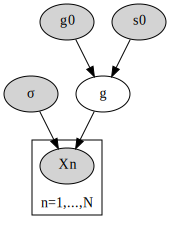

In [21]:
gn = Digraph('infer_normal_mu')
gn.node('g')
gn.node('g0', label='<g<sub>0</sub>>', style='filled')
gn.node('s0', label='<s<sub>0</sub>>', style='filled')
gn.edge('g0', 'g')
gn.edge('s0', 'g')
gn.node('sigma', label='<&sigma;>', style='filled')
with gn.subgraph(name='cluster_0') as sg:
    sg.node('Xn', label='<X<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gn.edge('g', 'Xn')
gn.edge('sigma', 'Xn')
gn.render('infer_normal_mu', format='png')
gn

We can directly condition on the variables that are at edges of the tree, $\sigma, g_0$ and $s_0$.
That is, you can just treat them as constants.
The joint probability density of the rest conditioned on these known parameters is (we read it from the graph):
$$
\begin{split}
p(x_{1:N}, g|\sigma, g_0, s_0) &=& p(x_{1:N}|g, \sigma) p(g|g_0, s_0)\\
&=& \left(\prod_{n=1}^Np(x_n|g, \sigma)\right) p(g|g_0, s_0)\\
&=& \left(\prod_{n=1}^NN(x_n|g,\sigma)\right)N(g|g_0,s_0)\\
&=& \left(\prod_{n=1}^N\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x_n-g)^2}{2\sigma^2}\right\}\right)\frac{1}{\sqrt{2\pi}s_0}\exp\left\{-\frac{(g-g_0)^2}{2s_0^2}\right\}\\
&\propto& \exp\left\{-\frac{\sum_{n=1}^N(x_n-g)^2}{2\sigma^2}-\frac{(g-g_0)^2}{2s_0^2}\right\},
\end{split}
$$
where we have ignored all proportionality constants for convenience.

From Bayes' rule, we have that our posterior state of knowledge:
$$
\begin{split}
p(g|x_{1:N}, \sigma, g_0, s_0) &=& \frac{p(x_{1:N}, g|\sigma, g_0, s_0)}{p(x_{1:N}|\sigma, g_0, s_0)}\\
&\propto& p(x_{1:N}, g|\sigma, g_0, s_0)\\
&\propto& \exp\left\{-\frac{\sum_{n=1}^N(x_n-g)^2}{2\sigma^2}-\frac{(g-g_0)^2}{2s_0^2}\right\}.
\end{split}
$$

That's pretty much the answer without the normalization constant.
But in this particular case, we can actually match this posterior to a normal distribution by following a technique known as "completing the square."
It is straightfoward, but it takes a little bit of algebra.
You take whatever is inside the exponentials and you try to form something like $(g-g')^2$ for some $g'$, whatever it turns out to be.
Let's try it out (you can lump into an additive "const" everything that doesn't depend on $g$):
$$
\begin{split}
\frac{\sum_{n=1}^N(x_n-g)^2}{2\sigma^2}+\frac{(g-g_0)^2}{2s_0^2} &=&
\frac{s_0^2 \sum_{n=1}^N(x_n-g)^2 + \sigma^2 (g-g_0)^2}{2\sigma^2s_0^2}\\
&=& \frac{s_0^2 N g^2 - 2s_0^2g\sum_{n=1}^Nx_n + s_0^2\sum_{n=1}^Nx_n + \sigma^2 g^2 - 2\sigma^2 gg_0 + \sigma^2g_0^2}{2\sigma^2s_0^2}\\
&=& \frac{g^2(s_0^2 N + \sigma^2) - 2 g (s_0^2\sum_{n=1}^Nx_n + \sigma^2 g_0)}{2\sigma^2s_0^2}+\text{const}\\
&=& \frac{g^2 - 2 g(s_0^2\sum_{n=1}^Nx_n + \sigma^2 g_0)(s_0^2 N + \sigma^2)^{-1}}{2\sigma^2s_0^2(s_0^2 N + \sigma^2)^{-1}} + \text{const}\\
&=& \frac{g^2 - 2 g \frac{1}{\frac{N}{\sigma^2} + \frac{1}{s_0^2}}\left(\frac{g_0}{s_0^2} + \frac{\sum_{n=1}^Nx_n}{\sigma^2}\right)}{2\left(\frac{1}{s_0^2} + \frac{N}{\sigma^2}\right)^{-1}} + \text{const}.
\end{split}
$$
Ok, it takes a bit more algebra than usual.
Now, we put this back into the exponential (with the minus sign in front of it), and we observe that it gives a normal for the posterior:
$$
p(g|x_{1:N}, \sigma, g_0, s_0) = N\left(g\middle| \frac{1}{\frac{N}{\sigma^2} + \frac{1}{s_0^2}}\left(\frac{g_0}{s_0^2} + \frac{\sum_{n=1}^Nx_n}{\sigma^2}\right),
\left(\frac{1}{s_0^2} + \frac{N}{\sigma^2}\right)^{-1}
\right).
$$
Not very pretty. But it is what it is. Let's experiment with this.

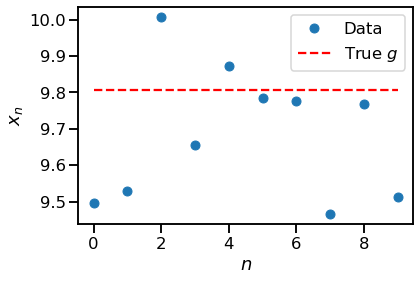

In [17]:
# Get the true acceleration of gravity from scipy
import scipy.constants
g_true = scipy.constants.g
# Generate some synthetic data
N = 10
sigma = 0.2
gs = g_true + sigma * np.random.randn(N)
fig, ax = plt.subplots()
ax.plot(gs, 'o', label='Data')
ax.plot(range(N), [g_true] * N, 'r--', label='True $g$')
ax.set_xlabel('$n$')
ax.set_ylabel('$x_n$')
plt.legend(loc='best')

In [18]:
# Our prior state of knowledge
g0 = 9.8
s0 = 0.2
G_prior = st.norm(g0, s0)
# We shoed that the posterior for g conditioned on data is a Gaussian with mean
gn = 1.0 / (N / sigma ** 2 + 1.0 / s0 ** 2) * (g0 / s0 ** 2 + gs.sum() / sigma ** 2)
# And standard deviation
sigman = np.sqrt(1.0 / (1.0 / s0 ** 2 + N / sigma ** 2))
print('The posterior of g is N({0:1.2f}, ({1:1.2f})^2)'.format(gn, sigman))

The posterior of g is N(9.70, (0.06)^2)


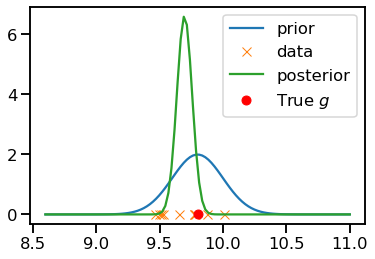

In [19]:
# Let's draw this
G_post = st.norm(gn, sigman)
fig, ax = plt.subplots()
ggs = np.linspace(g0 - 6.0 * s0, g0 + 6.0 * s0, 100)
ax.plot(ggs, G_prior.pdf(ggs), label='prior')
ax.plot(gs, np.zeros(gs.shape), 'x', label='data')
ax.plot(ggs, G_post.pdf(ggs), label='posterior')
ax.plot([g_true], [0.0], 'ro', label='True $g$')
plt.legend(loc='best');

In [20]:
# Let's get a predictive interval:
g_025 = G_post.ppf(0.025)
g_975 = G_post.ppf(0.975)
print('g is in [{0:1.2f}, {1:1.2f}] with 95% probability'.format(g_025, g_975))

g is in [9.58, 9.81] with 95% probability


### Questions

+ Experiment with the a very wrong prior knowledge, say $g_0 = 5$. Try at least a case where you are wrong but not very sure $s_0 = 1.0$ and a case where you are wrong and very sure $s_0 = 0.01$.
In both cases, increase $N$ until you get close enough to the true value of $g$.